# SubMax Processing

Notes: Single notebook, currently using it with the first person ALP. 

Goal is to get a sense of the data, plot it and visualize

**Instructions**

* Extract the 40 strokes whose peak speed values are closest to the median speed within each of the following speed ranges:
   * 60% vMxS (1–60 s)
   * 70% vMxS (61–120 s)
   * 80% vMxS (121–180 s)
* The start of the test (0s) is defined as the point when the speed exceeds 0.1 km/h and subsequently increases continuously.

In [27]:
import pandas as pd
import numpy as np
from pprint import pprint

In [2]:
df = pd.read_csv("/Users/katieli/Research/wheelchair/data/raw/SubMax/HYB/ALP_submax_HYB.csv")

In [3]:
df.describe()

,time[sec],cycle[count],acc_x_R[m/s2],acc_y_R[m/s2],gyro_z_R[rad/s],force_x_R[N],force_y_R[N],force_z_R[N],moment_x_R[Nm],moment_y_R[Nm],...,moment_y_L[Nm],moment_z_L[Nm],speed_L[km/h],distance_L[km],theta_cop_L[deg],tangential_force_L[N],radial_force_L[N],axle_force_L[N],phi_cop_L[deg],m_copz_L[Nm]
count,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,81491.000000,...,81491.000000,81491.000000,81491.000000,81491.000000,14066.000000,14066.000000,14066.000000,81491.000000,14066.000000,14066.000000
mean,101.862500,103.602668,1.027685,0.014568,-21.053568,0.903995,-1.024366,13.582015,-0.235400,-0.061079,...,-0.015771,-1.910244,25.113271,0.637568,108.967755,81.761780,60.841487,15.158937,25.306088,0.524094
std,58.811424,66.505317,7.379572,7.463640,5.777643,42.512173,42.766762,34.706434,4.667405,4.452004,...,4.738114,5.588656,6.901496,0.435290,55.922875,57.379559,68.268109,38.058129,33.092271,3.018623
min,0.000000,0.000000,-38.389407,-37.737040,-26.837362,-345.665264,-331.328759,-80.444246,-32.761869,-32.117968,...,-28.674169,-40.747369,-0.086623,-0.000114,0.802752,-72.725483,-253.299629,-62.556278,-83.151420,-18.454908
25%,50.931250,45.000000,-5.028576,-5.938960,-25.294251,-3.146851,-2.904747,-0.599336,-0.326928,-0.170728,...,-0.140832,-0.231317,23.191982,0.252271,56.891142,25.653856,1.116751,-0.780328,1.069496,-1.528171
50%,101.862500,104.000000,1.534704,0.034160,-22.391073,-0.711029,-0.320224,0.466151,-0.078261,0.019933,...,0.035155,-0.053381,26.702753,0.609790,103.973413,90.469005,64.927297,0.260110,36.798765,0.252612
75%,152.793750,162.000000,7.510321,6.246400,-19.447456,1.629889,1.597469,2.130974,0.120999,0.230081,...,0.220441,0.071174,30.182952,1.010959,159.385806,131.063502,110.314251,1.950820,52.939876,2.489158
max,203.725000,211.000000,40.054725,30.787920,0.038312,335.074543,325.685009,227.414818,31.743103,31.398994,...,33.469886,8.638798,32.345974,1.421184,359.159839,233.241351,276.555082,228.896153,74.803396,14.967823


In [7]:
df.columns

Index(['time[sec]', 'cycle[count]', 'acc_x_R[m/s2]', 'acc_y_R[m/s2]',
       'gyro_z_R[rad/s]', 'force_x_R[N]', 'force_y_R[N]', 'force_z_R[N]',
       'moment_x_R[Nm]', 'moment_y_R[Nm]', 'moment_z_R[Nm]', 'speed_R[km/h]',
       'distance_R[km]', 'theta_cop_R[deg]', 'tangential_force_R[N]',
       'radial_force_R[N]', 'axle_force_R[N]', 'phi_cop_R[deg]',
       'm_copz_R[Nm]', 'acc_x_L[m/s2]', 'acc_y_L[m/s2]', 'gyro_z_L[rad/s]',
       'force_x_L[N]', 'force_y_L[N]', 'force_z_L[N]', 'moment_x_L[Nm]',
       'moment_y_L[Nm]', 'moment_z_L[Nm]', 'speed_L[km/h]', 'distance_L[km]',
       'theta_cop_L[deg]', 'tangential_force_L[N]', 'radial_force_L[N]',
       'axle_force_L[N]', 'phi_cop_L[deg]', 'm_copz_L[Nm]'],
      dtype='object')

In [8]:
df[['speed_L[km/h]', 'speed_R[km/h]']]

,speed_L[km/h],speed_R[km/h]
0,-0.040764,-0.002548
1,-0.040764,0.000000
2,-0.035668,-0.002548
3,-0.038216,-0.002548
4,-0.038216,-0.007643
...,...,...
81486,16.522026,16.646865
81487,16.514383,16.646865
81488,16.509287,16.646865
81489,16.509287,16.631578


In [63]:
df['power_z[W]'] = df['gyro_z_R[rad/s]']*df['moment_z_R[Nm]']

In [64]:
# Import plotting setup
import seaborn as sns
import matplotlib.pyplot as plt


# ChatGPT selected fonts
sns.set_theme(
    style="whitegrid",        # clean backgrounds
    context="notebook",       # comfortable font sizing
)
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False



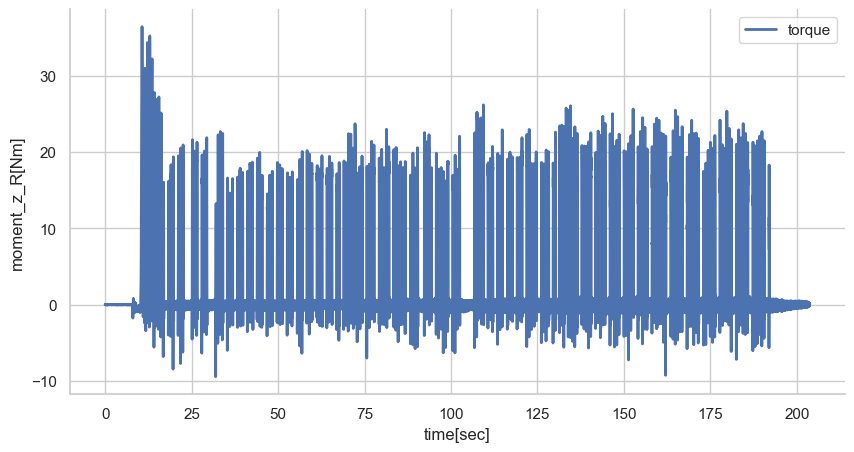

In [65]:
# plot the right hand speed
sns.lineplot(data=df, x="time[sec]", y="moment_z_R[Nm]", label="torque")
plt.legend()

<Axes: xlabel='moment_z_R[Nm]', ylabel='Count'>

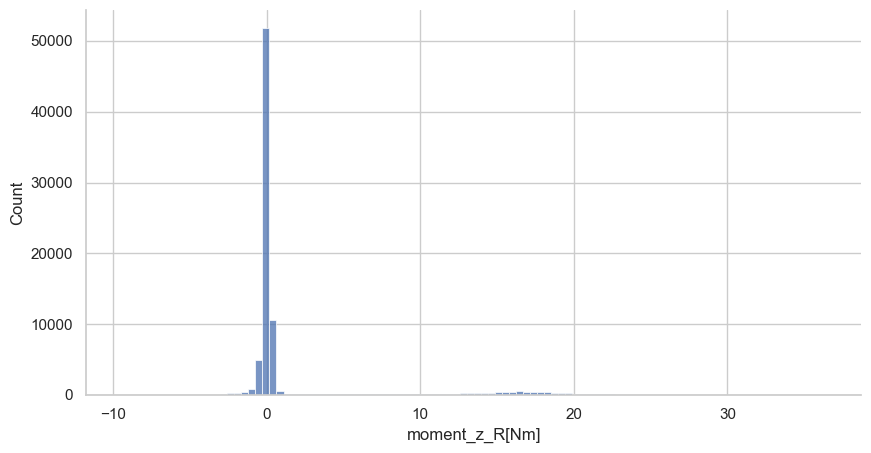

In [66]:
sns.histplot(data=df[df["moment_z_R[Nm]"] !=0], x="moment_z_R[Nm]", bins=100)


In [67]:
df[df['speed_R[km/h]'] !=0]["moment_z_R[Nm]"]

0        0.004524
2        0.018095
3        0.022618
4        0.022618
5       -0.004524
           ...   
81486   -0.094997
81487    0.049760
81488    0.113092
81489    0.000000
81490   -0.004524
Name: moment_z_R[Nm], Length: 80663, dtype: float64

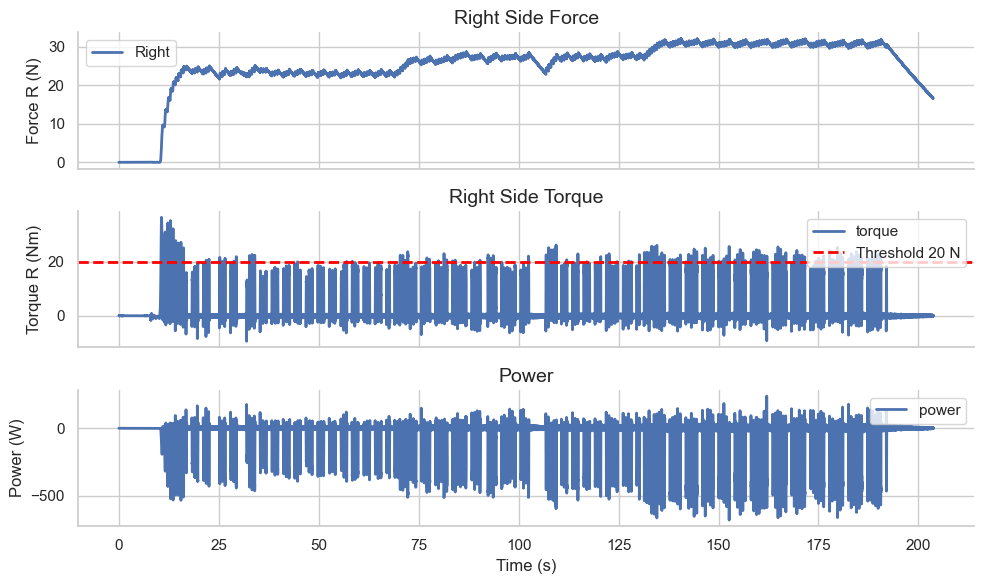

In [81]:
# Example: plot force_R and force_L in separate panels
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)  # 2 rows, 1 column

# Top plot
sns.lineplot(data=df, x="time[sec]", y="speed_R[km/h]", ax=axes[0], label="Right")
axes[0].set_ylabel("Force R (N)")
axes[0].legend()
axes[0].set_title("Right Side Force")


# Bottom plot
sns.lineplot(data=df, x="time[sec]", y="moment_z_R[Nm]", ax=axes[1], label="torque")
axes[1].axhline(y=20, color="red", linestyle="--", linewidth=2, label="Threshold 20 N")
axes[1].set_ylabel("Torque R (Nm)")
axes[1].legend()
axes[1].set_xlabel("Time (s)")
axes[1].set_title("Right Side Torque")


# Bottom plot
sns.lineplot(data=df, x="time[sec]", y="power_z[W]", ax=axes[2], label="power")
axes[2].set_ylabel("Power (W)")
axes[2].legend(loc="upper right")
axes[2].set_xlabel("Time (s)")
axes[2].set_title("Power")

plt.tight_layout()
plt.show()

In [45]:
df["moment_z_R[Nm]"].describe()

count    81491.000000
mean         1.850161
std          5.338325
min         -9.445426
25%         -0.081426
50%          0.031666
75%          0.212613
max         36.420079
Name: moment_z_R[Nm], dtype: float64

## Exploration and chaos


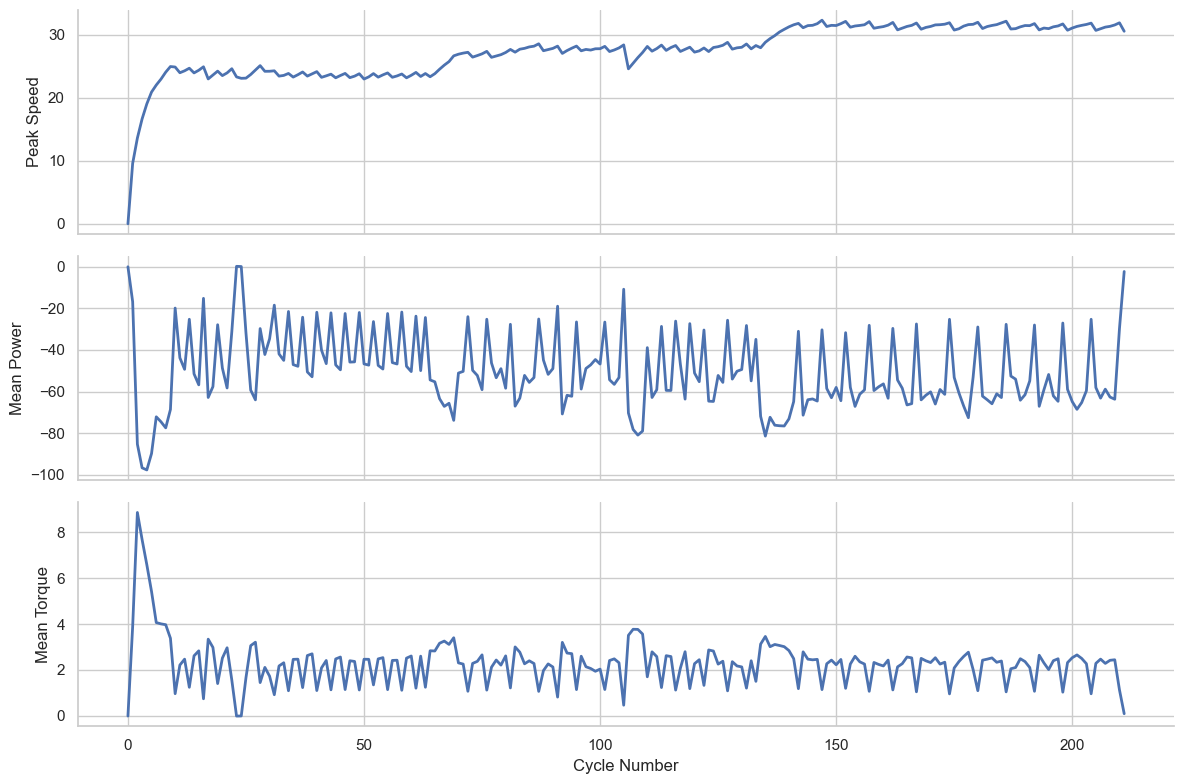

In [82]:
cycle_stats = df.groupby('cycle[count]').agg({
    'speed_L[km/h]': ['max', 'mean'],  # peak and mean speed per cycle
    'power_z[W]': ['max', 'mean'],  # assuming you calculate power
    'moment_z_R[Nm]': ['max', 'mean'], # assuming you calculate torque
    'time[sec]': 'min'  # cycle start time
}).reset_index()

# Flatten column names
cycle_stats.columns = ['cycle', 'peak_speed', 'mean_speed', 
                        'peak_power', 'mean_power',
                        'peak_torque', 'mean_torque', 'time']

# Plot to visualize steady-state
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axes[0].plot(cycle_stats['cycle'], cycle_stats['peak_speed'])
axes[0].set_ylabel('Peak Speed')
axes[1].plot(cycle_stats['cycle'], cycle_stats['mean_power'])
axes[1].set_ylabel('Mean Power')
axes[2].plot(cycle_stats['cycle'], cycle_stats['mean_torque'])
axes[2].set_ylabel('Mean Torque')
axes[2].set_xlabel('Cycle Number')
plt.tight_layout()
plt.show()

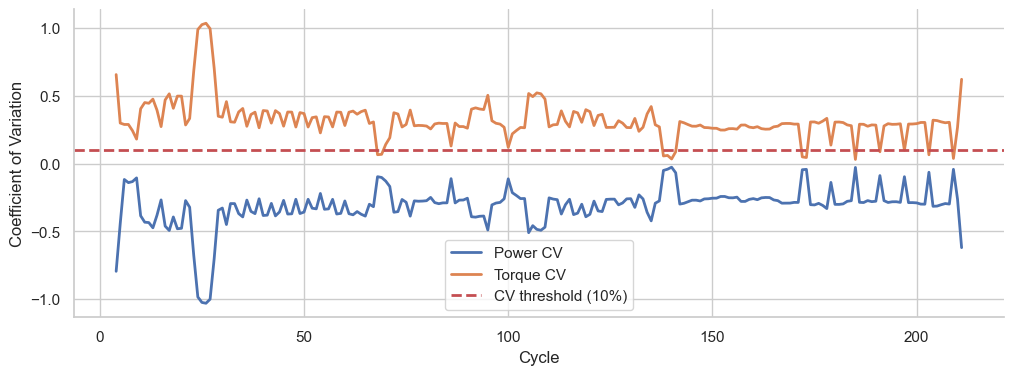

In [83]:
# Simple approach: rolling coefficient of variation
window_size = 5  # cycles

cycle_stats['power_rolling_cv'] = (
    cycle_stats['mean_power'].rolling(window_size).std() / 
    cycle_stats['mean_power'].rolling(window_size).mean()
)

cycle_stats['torque_rolling_cv'] = (
    cycle_stats['mean_torque'].rolling(window_size).std() / 
    cycle_stats['mean_torque'].rolling(window_size).mean()
)

# Plot CV to see where it stabilizes
plt.figure(figsize=(12, 4))
plt.plot(cycle_stats['cycle'], cycle_stats['power_rolling_cv'], label='Power CV')
plt.plot(cycle_stats['cycle'], cycle_stats['torque_rolling_cv'], label='Torque CV')
plt.axhline(y=0.1, color='r', linestyle='--', label='CV threshold (10%)')
plt.xlabel('Cycle')
plt.ylabel('Coefficient of Variation')
plt.legend()
plt.show()

In [87]:
# Simple exclusion approach
min_cycle_to_include = 3  # exclude first 10 cycles (acceleration phase)

# For time window 1-60s at 60% vMxS
time_window_1 = cycle_stats[
    (cycle_stats['time'] >= 1) & 
    (cycle_stats['time'] <= 60) &
    (cycle_stats['cycle'] > min_cycle_to_include)  # exclude acceleration
]

# Then find 40 closest to median
median_speed = time_window_1['peak_speed'].median()
time_window_1['diff_from_median'] = np.abs(time_window_1['peak_speed'] - median_speed)
selected_cycles = time_window_1.nsmallest(40, 'diff_from_median')

/var/folders/19/4g92jwjd61zcj030pc5pld7m0000gn/T/ipykernel_67782/2912316729.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_window_1['diff_from_median'] = np.abs(time_window_1['peak_speed'] - median_speed)


In [88]:
selected_cycles.sort_values(by="cycle")

,cycle,peak_speed,mean_speed,peak_power,mean_power,peak_torque,mean_torque,time,power_rolling_cv,torque_rolling_cv,diff_from_median
8,8,24.088783,23.414791,59.865389,-77.434732,27.209884,3.975838,15.4375,-0.133026,0.242121,0.345217
11,11,23.997065,23.521364,76.958303,-43.774891,16.190220,2.215163,18.2750,-0.432233,0.449232,0.253499
12,12,24.305340,23.777263,80.863374,-49.295442,18.316346,2.472280,18.9600,-0.435083,0.444078,0.561774
14,14,23.971587,23.504430,77.606308,-51.489023,19.497024,2.617288,21.1000,-0.380952,0.393475,0.228022
15,15,24.394510,23.935795,149.398925,-56.754870,20.528421,2.835798,21.7900,-0.268110,0.272054,0.650945
18,18,23.625096,23.090247,55.560473,-57.616287,20.116767,2.984041,25.8125,-0.393789,0.407032,0.118469
19,19,24.254385,23.330107,76.798088,-27.863696,21.283875,1.407402,26.4700,-0.480751,0.496885,0.510820
20,20,23.543569,23.065179,119.579700,-48.686981,19.619163,2.516757,27.9350,-0.477279,0.496732,0.199997
21,21,23.974135,23.488085,68.500205,-58.260163,20.125815,2.968638,28.6225,-0.273008,0.284034,0.230570
23,23,23.334655,22.995877,13.989382,0.217020,0.574506,-0.011309,30.5775,-0.676938,0.682581,0.408911


In [146]:
import pandas as pd
import numpy as np


# Calculate rolling coefficient of variation (CV)
window_size = 4 # rolling window of 5 cycles

cycle_stats['power_cv'] = (
    cycle_stats['mean_power'].rolling(window_size).std() / 
    cycle_stats['mean_power'].rolling(window_size).mean()
)

cycle_stats['torque_cv'] = (
    cycle_stats['mean_torque'].rolling(window_size).std() / 
    cycle_stats['mean_torque'].rolling(window_size).mean()
)

# Define steady-state as where BOTH power and torque CV drop below threshold
cv_threshold = 0.2 # percentage% - can adjust if needed

cycle_stats['is_steady_state'] = (
    (cycle_stats['power_cv'].abs() < cv_threshold) & 
    (cycle_stats['torque_cv'].abs() < cv_threshold)
)

# Find first cycle where steady-state begins
steady_state_start = cycle_stats[cycle_stats['is_steady_state']]['cycle'].min()

print(f"Steady-state begins at cycle: {steady_state_start}")

# Now filter for your time window AND steady-state
time_window_1 = cycle_stats[
    (cycle_stats['time'] >= 1) & 
    (cycle_stats['time'] <= 60) &
    (cycle_stats['cycle'] >= steady_state_start)  # only steady-state cycles
]

# Select 40 closest to median
median_speed = time_window_1['peak_speed'].median()
time_window_1['diff_from_median'] = np.abs(time_window_1['peak_speed'] - median_speed)
selected_cycles = time_window_1.nsmallest(40, 'diff_from_median')

Steady-state begins at cycle: 8


/var/folders/19/4g92jwjd61zcj030pc5pld7m0000gn/T/ipykernel_67782/164133138.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_window_1['diff_from_median'] = np.abs(time_window_1['peak_speed'] - median_speed)


<Axes: ylabel='is_steady_state'>

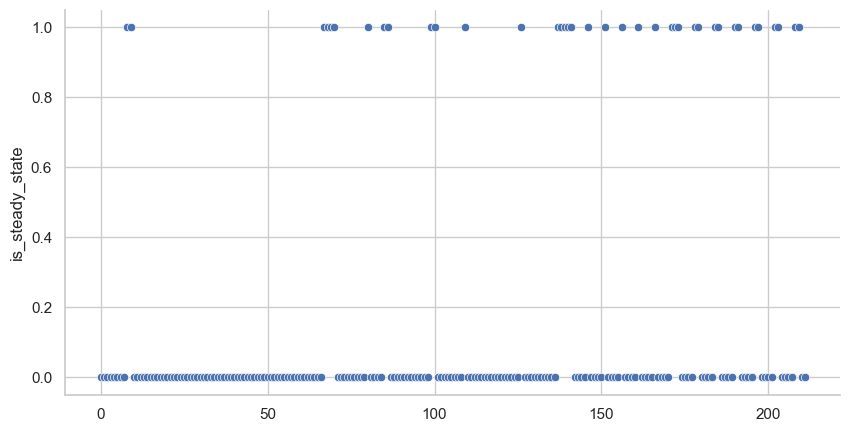

In [147]:
sns.scatterplot(cycle_stats['is_steady_state'])

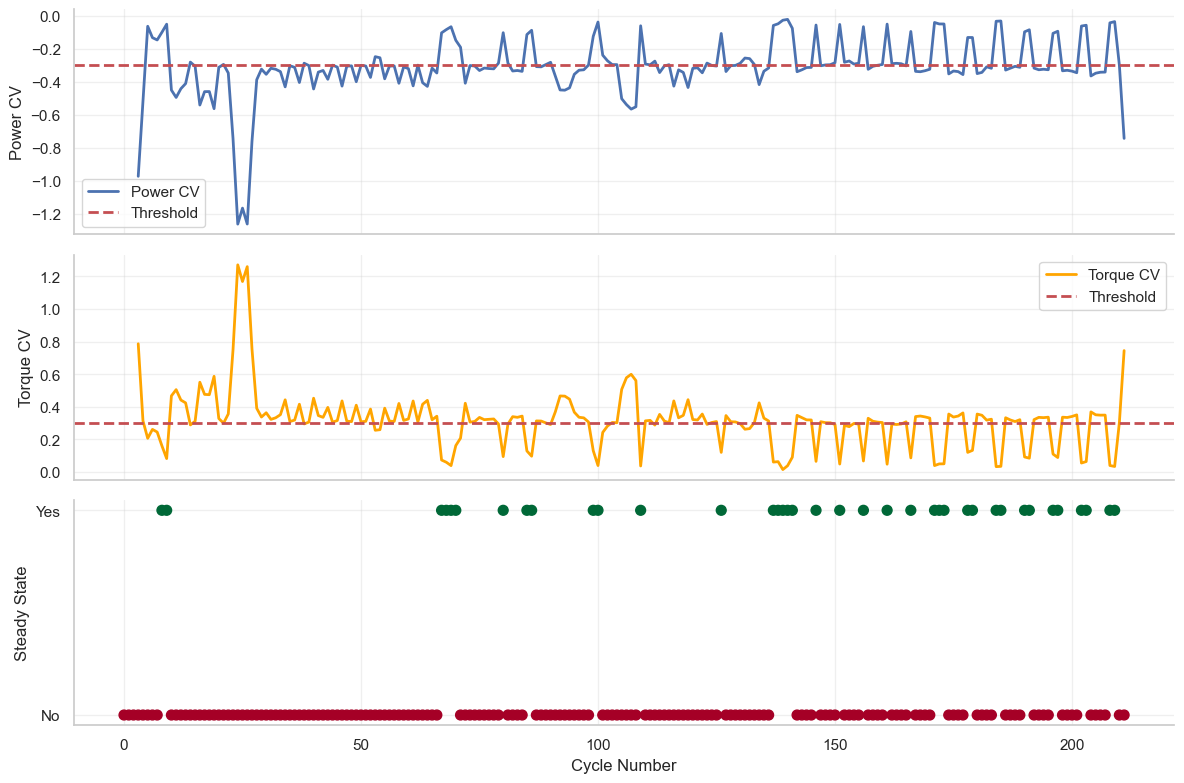

In [148]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot CVs
axes[0].plot(cycle_stats['cycle'], cycle_stats['power_cv'], label='Power CV')
axes[0].axhline(y=-0.3, color='r', linestyle='--', label='Threshold')
axes[0].set_ylabel('Power CV')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(cycle_stats['cycle'], cycle_stats['torque_cv'], label='Torque CV', color='orange')
axes[1].axhline(y=0.3, color='r', linestyle='--', label='Threshold')
axes[1].set_ylabel('Torque CV')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Show steady-state as shaded regions
axes[2].scatter(cycle_stats['cycle'], cycle_stats['is_steady_state'], 
                c=cycle_stats['is_steady_state'], cmap='RdYlGn', s=50)
axes[2].set_ylabel('Steady State')
axes[2].set_xlabel('Cycle Number')
axes[2].set_yticks([0, 1])
axes[2].set_yticklabels(['No', 'Yes'])
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [149]:
is_steady = cycle_stats['is_steady_state']
is_steady[is_steady].index[0]

np.int64(8)

In [150]:
cycle_stats['abs_power'] = cycle_stats['mean_power'].abs()
cycle_stats['abs_torque'] = cycle_stats['mean_torque'].abs()

# Then calculate CV on absolute values
cycle_stats['power_cv'] = (
    cycle_stats['abs_power'].rolling(window_size).std() / 
    cycle_stats['abs_power'].rolling(window_size).mean()
)

cycle_stats['torque_cv'] = (
    cycle_stats['abs_torque'].rolling(window_size).std() / 
    cycle_stats['abs_torque'].rolling(window_size).mean()
)

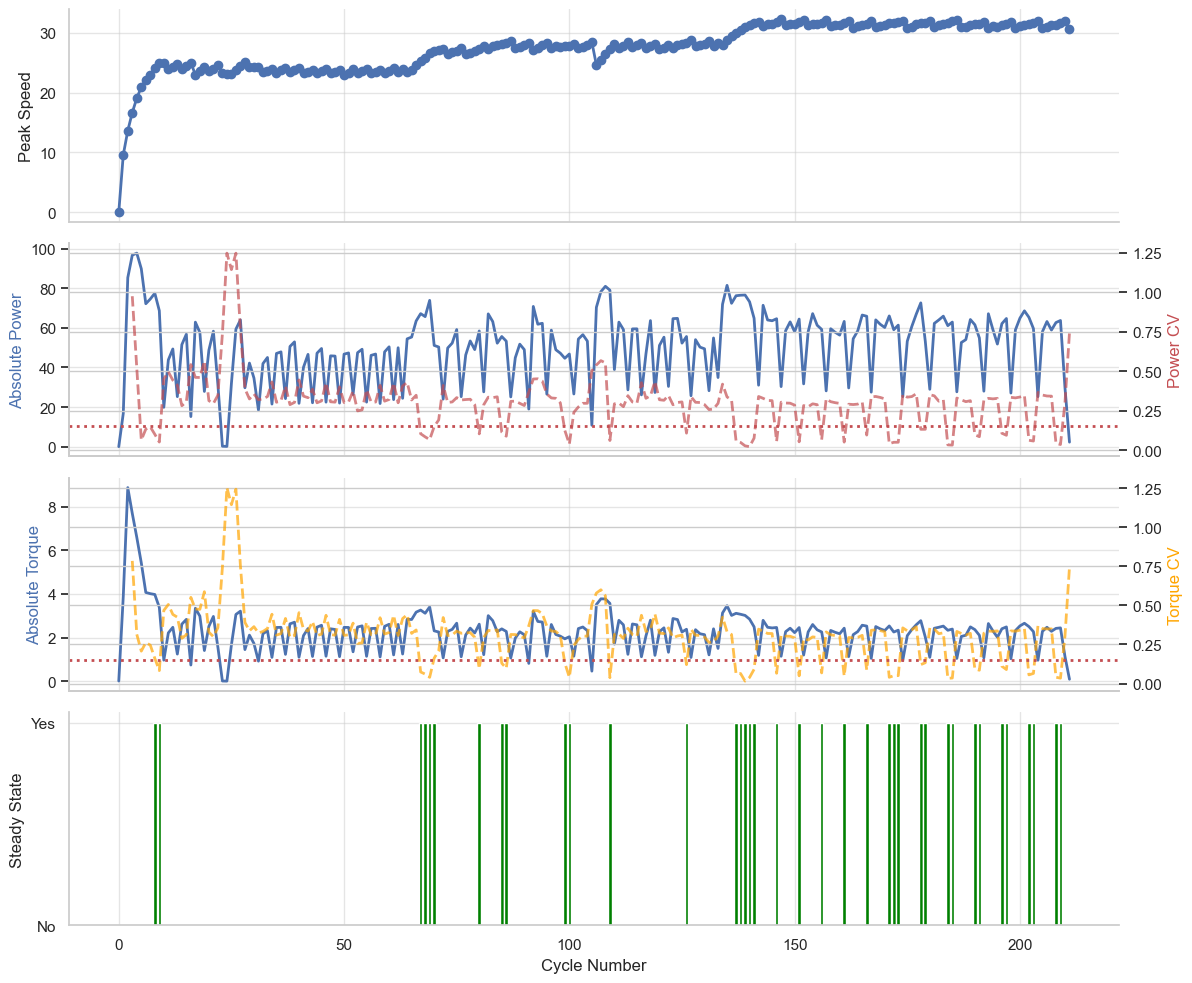

In [151]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot 1: Peak Speed
axes[0].plot(cycle_stats['cycle'], cycle_stats['peak_speed'], 'o-')
axes[0].set_ylabel('Peak Speed')
axes[0].grid(True, alpha=0.5)

# Plot 2: Power with CV
ax2_twin = axes[1].twinx()
axes[1].plot(cycle_stats['cycle'], cycle_stats['abs_power'], 'b-', label='Abs Power')
ax2_twin.plot(cycle_stats['cycle'], cycle_stats['power_cv'], 'r--', alpha=0.7, label='Power CV')
ax2_twin.axhline(y=0.15, color='r', linestyle=':', label='CV Threshold')
axes[1].set_ylabel('Absolute Power', color='b')
ax2_twin.set_ylabel('Power CV', color='r')
axes[1].grid(True, alpha=0.5)

# Plot 3: Torque with CV
ax3_twin = axes[2].twinx()
axes[2].plot(cycle_stats['cycle'], cycle_stats['abs_torque'], 'b-', label='Abs Torque')
ax3_twin.plot(cycle_stats['cycle'], cycle_stats['torque_cv'], 'orange', linestyle='--', alpha=0.7, label='Torque CV')
ax3_twin.axhline(y=0.15, color='r', linestyle=':', label='CV Threshold')
axes[2].set_ylabel('Absolute Torque', color='b')
ax3_twin.set_ylabel('Torque CV', color='orange')
axes[2].grid(True, alpha=0.5)

# Plot 4: Steady-state indicator
axes[3].bar(cycle_stats['cycle'], cycle_stats['is_steady_state'], 
            color=['red' if not ss else 'green' for ss in cycle_stats['is_steady_state']])
axes[3].set_ylabel('Steady State')
axes[3].set_xlabel('Cycle Number')
axes[3].set_yticks([0, 1])
axes[3].set_yticklabels(['No', 'Yes'])
axes[3].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

In [152]:
# For 60% vMxS time window (1-60s)
time_window_1 = cycle_stats[
    (cycle_stats['time'] >= 1) & 
    (cycle_stats['time'] <= 60) &
    (cycle_stats['is_steady_state'] == True)  # only steady-state cycles
]

# Calculate median peak speed in THIS steady-state region
median_speed = time_window_1['peak_speed'].median()

# "Typical" = closest to median
time_window_1['diff_from_median'] = np.abs(time_window_1['peak_speed'] - median_speed)
typical_cycles = time_window_1.nsmallest(40, 'diff_from_median')

print(f"Median speed: {median_speed:.2f}")
print(f"Selected {len(typical_cycles)} typical cycles")
print(f"Speed range: {typical_cycles['peak_speed'].min():.2f} - {typical_cycles['peak_speed'].max():.2f}")

Median speed: 24.54
Selected 2 typical cycles
Speed range: 24.09 - 24.98


/var/folders/19/4g92jwjd61zcj030pc5pld7m0000gn/T/ipykernel_67782/2747974428.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_window_1['diff_from_median'] = np.abs(time_window_1['peak_speed'] - median_speed)


In [153]:
# Check what you're working with
print(f"Total cycles in time window (1-60s): {len(time_window_1)}")
print(f"Steady-state cycles: {time_window_1['is_steady_state'].sum()}")
print(f"Non-steady-state cycles: {(~time_window_1['is_steady_state']).sum()}")

# See the distribution
time_window_1 = cycle_stats[
    (cycle_stats['time'] >= 1) & 
    (cycle_stats['time'] <= 60)
]
print(f"\nTotal cycles available: {len(time_window_1_all)}")

Total cycles in time window (1-60s): 2
Steady-state cycles: 2
Non-steady-state cycles: 0


NameError: name 'time_window_1_all' is not defined

In [175]:
# Use rolling standard deviation (works with any signed values)
window_size = 5

cycle_stats['power_std'] = cycle_stats['mean_power'].rolling(window_size).std()
cycle_stats['torque_std'] = cycle_stats['mean_torque'].rolling(window_size).std()

# Set thresholds
power_threshold = cycle_stats['power_std'].quantile(0.5)
torque_threshold = cycle_stats['torque_std'].quantile(0.5)

cycle_stats['is_steady_state'] = (
    (cycle_stats['power_std'] < power_threshold) & 
    (cycle_stats['torque_std'] < torque_threshold)
)

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Rolling std (detects stability)
window_size = 3
cycle_stats['power_std'] = cycle_stats['mean_power'].rolling(window_size).std()
cycle_stats['torque_std'] = cycle_stats['mean_torque'].rolling(window_size).std()

# 3. Mark steady-state (relax threshold to get ~40+ cycles)
power_threshold = cycle_stats['power_std'].quantile(0.7)  # bottom 70%
torque_threshold = cycle_stats['torque_std'].quantile(0.7)
cycle_stats['is_steady_state'] = (
    (cycle_stats['power_std'] < power_threshold) & 
    (cycle_stats['torque_std'] < torque_threshold)
)

# 4. Select 40 typical cycles from 1-60s window
time_window = cycle_stats[
    (cycle_stats['time'] >= 1) & 
    (cycle_stats['time'] <= 60) &
    (cycle_stats['is_steady_state'])
]

median_speed = time_window['peak_speed'].median()
time_window['diff'] = np.abs(time_window['peak_speed'] - median_speed)
selected = time_window.nsmallest(40, 'diff')

print(f"Selected {len(selected)} cycles")
print(f"Median speed: {median_speed:.2f}")

Selected 28 cycles
Median speed: 23.73


/var/folders/19/4g92jwjd61zcj030pc5pld7m0000gn/T/ipykernel_67782/870303828.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_window['diff'] = np.abs(time_window['peak_speed'] - median_speed)
